In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

from six.moves import range
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4: Initial Value Problems

## Question 1 - Lotka-Volterra

Consider the following system of equations
$$\begin{aligned}
    \frac{dp}{dt} &= b_0 \cdot p - d_0 \cdot p \cdot v \\
    \frac{dv}{dt} &= b_1 \cdot p \cdot v - d_1 \cdot v
\end{aligned}$$
where the unknown functions are $r(t)$ and $f(t)$ and $b_i, d_i \in \mathbb R^+$.  This system is commonly known as the Lotka-Volterra equations which model a simple predator-prey population model.  For our purposes the function $p(t)$ represents the population of tourists at the newly opened Jurassic Park (prey) and $v(t)$ the velociraptor population (predators).  Here we are also allowing the birth $b_i$ and death $d_i$ coefficients to vary in time with
$$
    b(t) = \begin{bmatrix}
        0.05 \cos^3(3 t / \pi) \\ 
        0.01 \sin^3(t / \pi)
    \end{bmatrix} \quad \quad \text{and} \quad \quad 
    d(t) = \begin{bmatrix}
        0.02 \cos(2 t / \pi) \\ 
        0.1 \sin(4 t / \pi)
    \end{bmatrix}
$$

**(a)** [5] Find the Jacobian of $f(t, u)$ and write a function that computes $f$ and the Jacobian $J$ given a $t$ and $u$.  Do not use `sympy` to write the Jacobian function although you can use it to check your answer.  We have provide the birth and death rate functions.

Rewriting:

$$\frac{d}{dt} \begin{bmatrix} p \\ v \end{bmatrix} = \begin{bmatrix} b_0p- d_0pv \\ b_1pv - d_1v \end{bmatrix} = \vec{f}(t, b, d, p, v) = \vec{f}(t, b, d, U)$$
$$\implies J_f(t, b, d, p, v) = \begin{bmatrix} b_0 - d_0v & -d_0p \\ b_1v & b_1p - d1 \end{bmatrix}  $$

In [2]:
def birth_rates(t):
    return numpy.array([0.05 * numpy.cos(t * 3.0 / numpy.pi)**3, 
                        0.01 * numpy.sin(t       / numpy.pi)**3])

def death_rates(t):
    return numpy.array([0.02 * numpy.cos(t * 2.0 / numpy.pi), 
                        0.10 * numpy.sin(t * 4.0 / numpy.pi)])

def f(t, U):
    """Right hand side of system."""
    # YOUR CODE HERE
    bs, ds = birth_rates(t), death_rates(t)
    b0, b1 = bs[0], bs[1]
    d0, d1 = ds[0], ds[1]
    p, v = U[0], U[1]
    answer = numpy.array([b0 * p - d0*p*v, b1*p*v - d1*v])
    return answer

def J(t, U):
    """Compute the Jacobian of the function f(t,u)"""
    # YOUR CODE HERE
    bs, ds = birth_rates(t), death_rates(t)
    b0, b1 = bs[0], bs[1]
    d0, d1 = ds[0], ds[1]
    p, v = U[0], U[1]
    answer = numpy.array([[b0 - d0*v, -d0*p], [b1*v, b1*p - d1]])
    return answer

In [3]:
t = 1.0
U = numpy.array([32.0, 5.1])
f_solution = numpy.array([-2.316188606456715 , -0.4375625749832442])
numpy.testing.assert_allclose(f(t, U), f_solution)
J_solution = numpy.array([[-0.0723808939517723, -0.5146302900664267], [ 0.0015633065704327, -0.0857965833300479]])
numpy.testing.assert_allclose(J(t, U), J_solution)
print("Success!")

Success!


**(b)** [5] Use `scipy.integrate` to solve the system using the function you wrote above.

In [4]:
import scipy.integrate as integrate

def solve_scipy(t, U_0):
    """Solve the system using scipy.integrate"""
    # YOUR CODE HERE
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0
    integrator = integrate.ode(f, jac=J)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[0, :])
    for n, t_n in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[n+1, :] = integrator.y
    return U

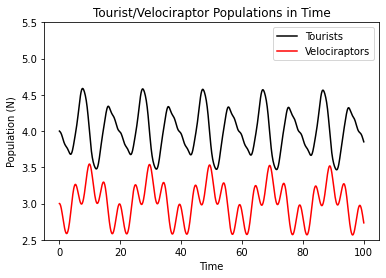

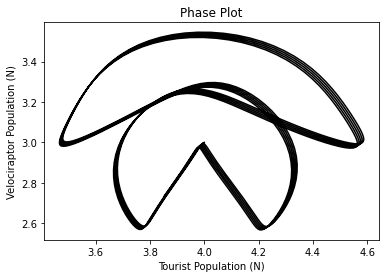

Success


In [5]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_scipy(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.0,  3.0],
                      [ 3.9279172294167317,  3.5408818585097022],
                      [ 3.9830673083618886,  2.980274473969855 ],
                      [ 3.8004716403312524,  3.5000374537033361],
                      [ 3.9585778183108209,  2.9333231345441941],
                      [ 3.6950925707002193,  3.4300538999244909],
                      [ 3.9234384730566925,  2.8657982222073044],
                      [ 3.6145728074599934,  3.3401620269783758],
                      [ 3.8810111262801268,  2.7871140670350409],
                      [ 3.5554505511662997,  3.2417027488327261]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

**(c)** [8] Consider the case where we wanted to use an implicit method, in this case backward Euler.  Since the function $f(t, u)$ is non-linear we must make some approximation to find the solution to the problem.  In the first case take the resulting ODE discretization and use a Taylor expansion of $f(t, u)$ about $(t^n, u(t^n))$ to find a new linear system that can be inverted to find the solution.  Write down this update scheme explicitly.

*Hint:* Sine the function $f(t, U)$ is dependent on two variables the Taylor series also will need to have derivatives with respect to both of these variables.  Note however that terms that will have time derivatives will also be multiplied by $\Delta t$ and therefore be higher order and can be safely ignored.

### Solution

Expanding Euler backwards update via taylor around $(t_n, u_n)$ gives us:

$$
f(t, u) = f(t_n, u_n) + \Delta t \frac{\partial f}{\partial t} + J_f(t_n, u_n)[u - u_n]
$$

Substitute and evaluate at $(t_{n+1}, u_{n+1})$:

$$
u_{n+1} = u_n + \Delta t \left(f(t_n, u_n) + \Delta t \frac{\partial f}{\partial t} + J_f(t_n, u_n)[u_{n+1} - u_n]  \right)
$$

$$
= u_n + \Delta t f(t_n, u_n) + \Delta t^2 \frac{\partial f}{\partial t} + \Delta t J_f(t_n, u_n)[u_{n+1} - u_n]
$$

$$
\approx u_n + \Delta t f(t_n, u_n) + \Delta t J_f(t_n, u_n)[u_{n+1} - u_n]
$$

Then:

$$
(I - \Delta t J_f(t_n, u_n))(u_{n+1}) = u_n + \Delta t (f(t_n, u_n) -  J_f(t_n, u_n)(u_n))
$$

Then: $u_{n+1}$ can then be evaluated by solving this system.

**(d)** [7] Write a function that computes the solution to the linearized system of equations from part (c) using the backward Euler method.  You may use `numpy.linalg.solve`.

In [6]:
def solve_linearization(t, U_0):
    """Solve the Tourist/Velociraptor problem using a linearization"""
    # YOUR CODE HERE
    
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0
    dim = U_0.shape[0]
    delta_t = t[1] - t[0]
    for n, t_n in enumerate(t[1:]):
        jacobian = J(t_n - delta_t, U[n, :])
        A = numpy.eye(dim) - (delta_t * jacobian)
        b = U[n, :] + delta_t * (f(t_n - delta_t, U[n, :]) - numpy.dot(jacobian, U[n, :]))
        U[n+1, :] = numpy.linalg.solve(A, b)

    return U


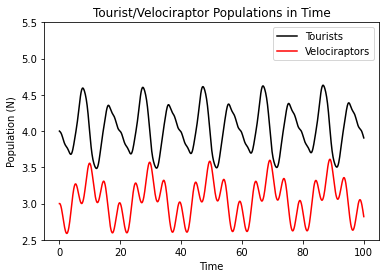

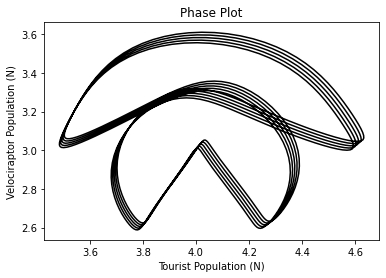

Success


In [7]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_linearization(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9562704025807616,  3.5550168469660899],
                      [ 3.9946656738865847,  3.0008012236746606],
                      [ 3.8363199595503161,  3.5396965282316728],
                      [ 3.9822873402068408,  2.9733440899499959],
                      [ 3.7357914034866888,  3.4934127671296538],
                      [ 3.9586406842928703,  2.9233357150626329],
                      [ 3.6590999818099319,  3.424489869445619 ],
                      [ 3.9260233789064363,  2.8596477917259606],
                      [ 3.6040049623838342,  3.3438868112108282]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

**(e)** [8] Again consider the use of backward Euler on the above system.  Now apply Newton's method to solve the system.  Formulate the approach mentioned writing down the eventual system of linear equations that needs to be solved.  Make sure to explicitly write down this system.

### Solution:

Via Euler backwards update we can get:

$$
g(u_{n+1}) = u_{n+1} - u_n - \Delta t f(t_{n+1}, u_{n+1}) = 0
$$

Newton's method on $g$ gives:

$$
u_{n+1} = u_n - \frac{g(u_n)}{\nabla_{u} g(u_n)} = u_n - \left(I - \Delta t J_f(t_n, u_n) \right)^{-1} g(u_n)
$$

which can be repeated until the desired tolerance is achieved.

**(f)** [7] Implement the method you derived in (e).  You may use `numpy.linalg.solve`.

In [8]:
def solve_newton(t, U_0, tolerance=1e-3):
    return U

In [9]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_newton(t, numpy.array([4.0, 3.0]), tolerance=1e-3)
print(repr(U[::100]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9134711585015927,  3.5492962949915734],
                      [ 3.9930517703869257,  2.9903348084254571],
                      [ 3.7994886843948481,  3.5222458630304252],
                      [ 3.9768706240486029,  2.9540238459613501],
                      [ 3.7073585349850822,  3.4668124684596084],
                      [ 3.9494771605525214,  2.8980683829809037],
                      [ 3.6389102010408898,  3.3924679483427114],
                      [ 3.9153001879623379,  2.8320597734640938],
                      [ 3.5902204721540936,  3.310623730889021 ]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

array([[4.                , 3.                ],
       [3.9562704025807625, 3.5550168469660925],
       [3.9946656738865793, 3.00080122367466  ],
       [3.836319959550304 , 3.5396965282316644],
       [3.982287340206824 , 2.9733440899499937],
       [3.735791403486674 , 3.4934127671296498],
       [3.9586406842928503, 2.923335715062632 ],
       [3.6590999818099124, 3.4244898694456203],
       [3.9260233789064105, 2.859647791725969 ],
       [3.604004962383814 , 3.3438868112108344]])


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 18 / 20 (90%)
Max absolute difference: 0.0427992440791698
Max relative difference: 0.010936389293733
 x: array([[4.      , 3.      ],
       [3.95627 , 3.555017],
       [3.994666, 3.000801],...
 y: array([[4.      , 3.      ],
       [3.913471, 3.549296],
       [3.993052, 2.990335],...

**(g)** [5] How might you go about choosing an appropriate method for an approach to the problem?  Back up your decision with evidence.

### Solution:

It depends on how important the nonlinear terms of $u$ and $t$ are. If the linearization we did (1st order approximation) can account for the non-linear terms well then linearization is okay. But if this is not the case, we use Newton-Raphson method since importance of higher derivatives are not assumed.

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()

## Question 2 - Damped Linear Pendulum

Consider the following linearized model for a swinging pendulum with frictional forces included
$$
    \theta''(t) = -a \theta(t) - b \theta'(t).
$$

**(a)** [5] Write this as a system of ODEs and compute the eigenvalues of the matrix.  What do you observe if the damping is set to zero?

### Solution

Our system is: 
$$
\theta''(t) = -a \theta(t) - b \theta'(t) \\
\theta'(t) = -a - b\theta(t) 
$$

Let
$$
u = 
\begin{bmatrix}
\theta \\
\theta'
\end{bmatrix}
=
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}
$$

Rewrite this as:
$$
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}'
=
\begin{bmatrix}
0 & 1 \\
-a & -b
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2
\end{bmatrix}
$$

Computing the eigenvalues of: 
$$
\begin{bmatrix}
0 & 1 \\
-a & -b
\end{bmatrix}
$$

gives us:

$$
\lambda = \frac{-b \pm \sqrt{b^2 - 4a}}{2}
$$

If the damping factor is set to $0$, the square root term becomes negative which results in imaginary eigenvalues.

**(b)** [9] Implement the leapfrog, trapezoidal rule and the 2-step explicit Adams-Bashforth method AB2 to solve the ODE above.  Use forward RK2 to start the methods when needed.

In [11]:
def solve_leapfrog(t, U_0, a, b):
    """Solve the damped linear pendulum problem using the leapfrog method
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
    # YOUR CODE HERE
    delta_t = t[1] - t[0]
    
    U = numpy.empty((2, t.shape[0]))
    U[:, 0] = U_0
    
    f1 = lambda t, U: U[1]
    f2 = lambda t, U: -a*U[0] - b*U[1]
    
    U[0,1] = U[0,0] + 0.5 * delta_t * f1(t[0], U[:,0])
    U[1,1] = U[1,0] + 0.5 * delta_t * f2(t[0], U[:,0])
    U[0,1] = U[0,0] + delta_t * f1(t[0] + 0.5 * delta_t, U[:,1])
    U[1,1] = U[1,0] + delta_t * f2(t[0] + 0.5 * delta_t, U[:,1])
       
    for n in range(1, t.shape[0] - 1):
        U[0,n + 1] = U[0, n - 1] + 2.0 * delta_t * f1(t[n], U[:,n])
        U[1,n + 1] = U[1, n - 1] + 2.0 * delta_t * f2(t[n], U[:,n])
        
    return U


def solve_trap(t, U_0, a, b):
    """Solve the damped linear pendulum problem using the trapezoidal method
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
    # YOUR CODE HERE
    delta_t = t[1] - t[0]
    U = numpy.empty((2, t.shape[0]))
    U[:, 0] = U_0

    decay_constant = 1
    integration_constant = (1.0 - decay_constant * delta_t / 2.0) / (1.0 + decay_constant * delta_t / 2.0)
     
    for n in range(t.shape[0] - 1):
        U[0, n + 1] = U[0, n] * integration_constant
        U[1, n + 1] = U[1, n] * integration_constant

    return U
   


def solve_AB2(t, U_0, a, b):
    """Solve the damped linear pendulum problem using 2-step Adams-Bashforth 
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
    # YOUR CODE HERE
    delta_t = t[1] - t[0]
    
    U = numpy.empty((2, t.shape[0]))
    U[:, 0] = U_0
    
    f1 = lambda t, U : U[1]
    f2 = lambda t, U: -a*U[0] - b*U[1]
    
    U[0, 1] = U[0, 0] + 0.5 * delta_t * f1(t[0], U[:, 0])
    U[0, 1] = U[0, 0] + delta_t * f1(t[0], U[:, 1])  
    U[1, 1] = U[1, 0] + 0.5 * delta_t * f2(t[0], U[:, 0])
    U[1, 1] = U[1, 0] + delta_t * f2(t[0], U[:, 1])
    
    for n in range(0,len(t)-2):
        U[0, n+2] = U[0, n + 1] + delta_t / 2.0 * (-f1(t[n], U[:, n]) + 3.0 * f1(t[n+1], U[:, n+1]))
        U[1, n+2] = U[1, n + 1] + delta_t / 2.0 * (-f2(t[n], U[:, n]) + 3.0 * f2(t[n+1], U[:, n+1]))
        
    return U

In [20]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_leapfrog(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-2
print("Success for Leapfrog!")

Error = 0.0015133841613135398
Success for Leapfrog!


In [12]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_trap(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-3
print("Success for trapezoidal method!")

Error = 1.9886193371251542


AssertionError: 

In [13]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_AB2(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-2
print("Success for Adams-Bashforth 2!")

Error = 0.0036592046569715094
Success for Adams-Bashforth 2!


**(c)** [10] Test the leapfrog, trapezoid, and AB2 methods (all of which are second
order accurate) for each of the following cases (and perhaps others of your 
choice) and comment on the behavior of each method.  Instead of plotting $\theta$ plot the phase plane solution, i.e. plot $\theta(t)$ vs. $\theta'(t)$.  You can (and should) be careful about choosing $\Delta t$.

1. $a = 100, ~b=0$ (undamped),
1. $a = 100, ~b=3$ (damped),
1. $a = 100, ~b=10$ (more damped).

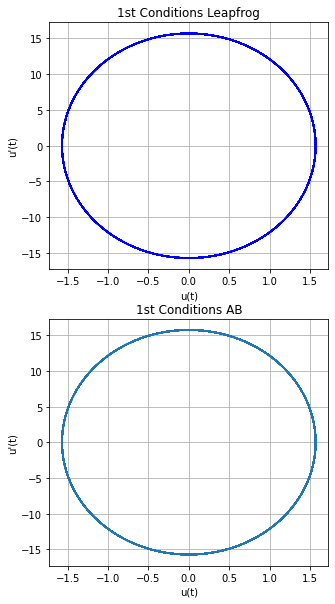

In [14]:
# YOUR CODE HERE
t = numpy.linspace(-2*numpy.pi, 2*numpy.pi, 10000)
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

a = 100.0
b = 0.0

u_leap = solve_leapfrog(t, U_0, a, b)
u_AB2 = solve_AB2(t, U_0, a, b)

fig = plt.figure(figsize=(5,10))
axes = fig.add_subplot(2, 1, 1)
axes.plot(u_leap[0,:], u_leap[1, :],'b')
axes.set_title("1st Conditions Leapfrog")
axes.set_xlabel("u(t)")
axes.set_ylabel("u'(t)")
axes.grid()

axes = fig.add_subplot(2,1,2)
axes.plot(u_AB2[0,:], u_AB2[1,:])
axes.set_title("1st Conditions AB")
axes.set_xlabel("u(t)")
axes.set_ylabel("u'(t)")
axes.grid()

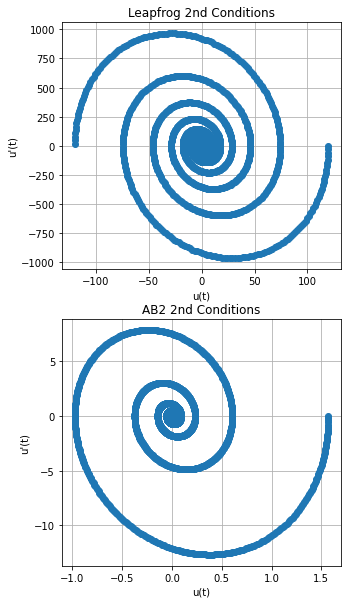

In [15]:
#2nd Conditions
a = 100.0
b = 3.0

u_leap = solve_leapfrog(t, U_0, a, b)
u_AB2 = solve_AB2(t, U_0, a, b)

fig = plt.figure(figsize=(5,10))
axes = fig.add_subplot(2, 1, 1)
axes.plot(u_leap[0,:], u_leap[1, :],'o')
axes.set_title("Leapfrog 2nd Conditions")
axes.set_xlabel("u(t)")
axes.set_ylabel("u'(t)")
axes.grid()

axes = fig.add_subplot(2,1,2)
axes.plot(u_AB2[0,:], u_AB2[1,:], 'o')
axes.set_title("AB2 2nd Conditions")
axes.set_xlabel("u(t)")
axes.set_ylabel("u'(t)")
axes.grid()

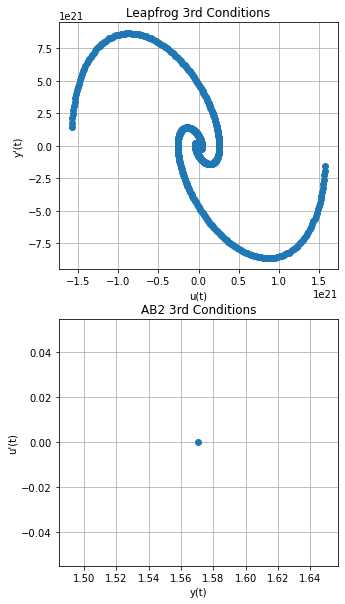

In [16]:
a = 100.0
b = 10.0

u_leap = solve_leapfrog(t, U_0, a, b)
u_AB2 = solve_AB2(t, U_0, a, b)

fig = plt.figure(figsize=(5,10))
axes = fig.add_subplot(2, 1, 1)
axes.plot(u_leap[0,:], u_leap[1, :],'o')
axes.set_title("Leapfrog 3rd Conditions")
axes.set_xlabel("u(t)")
axes.set_ylabel("y'(t)")
axes.grid()

axes = fig.add_subplot(2, 1, 2)
axes.plot(u_AB2[0,:], u_AB2[1,:], 'o')
axes.set_title("AB2 3rd Conditions")
axes.set_xlabel("y(t)")
axes.set_ylabel("u'(t)")
axes.grid()

YOUR ANSWER HERE

## Question 3 - $R(z)$ for One-Step Methods

Any $r$-stage Runge-Kutta method applied to $u'=\lambda u$ will give an
expression of the form
$$
    U^{n+1} = R(z)U^n
$$
where $z=\lambda \Delta t$ and $R(z)$ is a rational function, a ratio of
polynomials in $z$ each having degree at most $r$.  For an explicit method
$R(z)$ will simply be a polynomial of degree $r$ and for an implicit method
it will be a more general rational function.

Since $u(t_{n+1}) = e^z u(t_n)$ for this problem, we expect that a $p$th
order accurate method will give a function $R(z)$ satisfying
$$
    R(z) = e^z + \mathcal{O}(z^{p+1}) \quad\text{as}~~~~z \rightarrow 0,
$$
as discussed in the Remark on page 129 of LeVeque.  The rational function $R(z)$ also
plays a role in stability analysis.

One can determine the value of $p$ in the last equation by expanding $e^z$ in a Taylor
series about $z=0$, writing the $\mathcal{O}(z^{p+1})$ term as
$$
    C z^{p+1} + \mathcal{O}(z^{p+2}),
$$
multiplying through by the denominator of $R(z)$, and then collecting terms.
For example, for the trapezoidal method
$$
    \frac{1+z/2}{1-z/2} = \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})
$$
gives
$$
    \begin{split}
        1+\frac{1}{2} z &= \left(1-\frac{1}{2} z\right)\left( 1+z+\frac{1}{2} z^2 + \frac 1 6 z^3 + \cdots\right) + Cz^{p+1} + \mathcal{O}(z^{p+2})\\
                  &= 1 + \frac{1}{2} z - \frac{1}{12} z^3 + \cdots + Cz^{p+1}  + \mathcal{O}(z^{p+2})
    \end{split}
$$
and so
$$
    Cz^{p+1} = \frac{1}{12} z^3 + \cdots,
$$
from which we conclude that $p=2$.

**(a)** [5] Let 
$$
    R(z) = \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2}.
$$
Determine $p$ for this rational function as an approximation to $e^z$.

### Solution:

$$R(z) = \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2} = \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})$$

$$1 + \frac{1}{3}z = \left(1 + \frac 1 3 z - z^4 + z^5 + \cdots\right) + Cz^{p+1} + \mathcal{O}(z^{p+2})$$

$$ \frac{1}{36}z^4 + ... = Cz^{p+1} + \mathcal{O}(z^{p+2})$$

$$\therefore p=3$$

**(b)** [10] Determine $R(z)$ and $p$ for the backward Euler method.

### Solution

Backwards Euler is:
$$U_{n+1} = U_{n} + \Delta t f(t_{n+1},U_{n+1})$$

Absolute stability, we must have that:

$$\begin{aligned}
    0 &= U_{n+1} (1 - \Delta t \lambda) - U_n \\
    &= \xi (1 - z) - 1
\end{aligned}$$

where: 

$$\xi = \frac{1}{1 - z} \rightarrow R(z) = \frac{1}{1-z}$$

Then we have that: 

$$R(z) = \frac{1}{1 - z} = \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})$$
$$\rightarrow 1 = -\frac{1}{6} (z-1)(6+6z+3z^2+z^3 + \cdots) + Cz^{p+1} + \mathcal{O}(z^{p+2})$$
$$\rightarrow \frac{1}{6}\left(3z^2 + 2z^3 + z^4 + \cdots \right) = Cz^{p+1} + \mathcal{O}(z^{p+2})$$
$$\therefore p=1$$

**(c)** [10] Determine  $R(z)$ and $p$ for the TR-BDF2 given by
$$\begin{aligned}
    U^\ast &= U^n + \frac{\Delta t}{4} (f(U^n) + f(U^\ast)) \\
    U^{n+1} &= \frac{1}{3} (4 U^\ast - U^n + \Delta t f(U^{n+1})).
\end{aligned}$$
The name is comes from using a modified trapezoidal rule as the first stage and a two-step backwards difference formula for the second.

### Solution

In section 5.7 of Leveque, equation 5.37 rewrites TR-BDF2 as:

$$Y_1 = U^n$$
$$Y_2 = U^n + \frac{k}{4}\left[f(Y_1,t_n) + f\left(Y_2, t_n + \frac{k}{2}\right)\right]$$
$$Y_3 = U^n + \frac{k}{3}\left[f(Y_1,t_n) + f\left(Y_2, t_n + \frac{k}{2}\right) + f\left(Y_3,t_n+k\right)\right]$$
$$U^{n+1} = Y_3 = U^n + \frac{k}{3} \left[f\left(Y_1, t_n\right) + f\left(Y_2, t_n + \frac{k}{2}\right) + f\left(Y_3,t_n+k\right)\right]$$

From it's tableau in page 128, we get the $a$ and $b$ coefficients which gives us:

$$
R(z) = 1 + zb^T(I - za)^{-1} \\
\implies R(z)= \frac{1 + \frac{5}{12}z}{1 - \frac{7}{12}z + \frac{1}{12}z^2}
$$

Then: 

$$
1 + \frac{5z}{12} = \frac{3z^3}{72} + \frac{4z^4}{72} + \cdots = Cz^{p+1} + \mathcal{O}(z^{p+2}) \\
\implies p=2
$$

**(d)** [6] Plot all of the above absolute stability regions.  Make sure to determine which denotes the interior and exterior of the region.

In [17]:
#Code taken from APMA 4300 Notes

def stability_plot(X, Y, C, axes, title=None, continuous=True):
    
    if  continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C-1,0.)
    pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Blues_r'))
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')    
    
def plot_stability_ssms(R, x, y, axes=None, title=None):

    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot(X, Y, numpy.abs(R(Z)), axes, title)

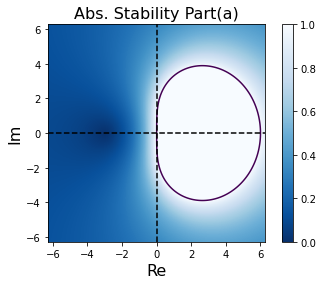

In [18]:
x = numpy.linspace(-2*numpy.pi,2*numpy.pi,1000)
y = numpy.linspace(-2*numpy.pi,2*numpy.pi,1000)

part_a = lambda z: (1 + z/3)/(1 - 2*z/3 + z**2 / 6)
backwards_euler = lambda z: 1/(1-z)
trbdf2 = lambda z: (1 + (5*z)/12) / (1 - (7*z)/12 + (z**2 / 12))

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plot_stability_ssms(part_a, x, y, axes=axes, title='Abs. Stability Part(a)')

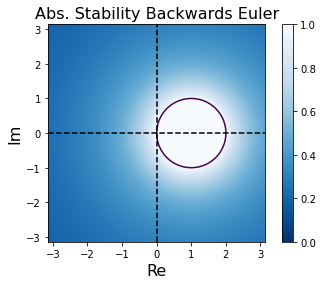

In [19]:
x = numpy.linspace(-numpy.pi,numpy.pi,1000)
y = numpy.linspace(-numpy.pi,numpy.pi,1000)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plot_stability_ssms(backwards_euler, x, y, axes=axes, title='Abs. Stability Backwards Euler')

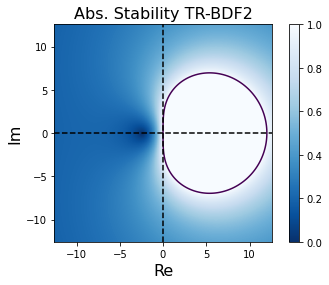

In [20]:
x = numpy.linspace(-4*numpy.pi,4*numpy.pi,1000)
y = numpy.linspace(-4*numpy.pi,4*numpy.pi,1000)
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plot_stability_ssms(trbdf2, x, y, axes=axes, title='Abs. Stability TR-BDF2')